In [ ]:
import numpy as np
import cv2 as cv
from ultralytics import YOLO


In [ ]:
from IPython import display
from IPython.display import display, Image
import glob

In [ ]:
import torch
import torchvision
print(torch.__version__)
print(torchvision.__version__)


In [ ]:
torch.cuda.is_available()

In [ ]:
model = YOLO("yolov8m.pt")
model.info()

In [ ]:
results = model.train(data="annotated/data_v2/data.yaml", epochs=60, imgsz=640, batch=8)

In [ ]:
Image(filename=f'runs/detect/train/confusion_matrix.png', width=800)

In [ ]:
Image(filename=f'runs/detect/train/results.png', width=800)

In [ ]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=annotated/data_v2/data.yaml

# run predictions

In [ ]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt source=unlabeled_data/ conf=0.6

In [ ]:
for image_path in glob.glob(f'runs/detect/predict3/*.jpg'):
    print(image_path)
    display(Image(filename=image_path, height=600))
    print("\n")

# active learning

In [ ]:
from PIL import Image, ImageFilter, ImageEnhance
import matplotlib.pyplot as plt
import matplotlib.image as image
import ipywidgets as widgets
from IPython.display import display, clear_output
import glob
import os
import shutil

In [ ]:
MODEL_DIR = "train"
DATA = "active_learning/unlabeled_data/*.jpg"

In [ ]:
check_model = YOLO(f"runs/detect/{MODEL_DIR}/weights/best.pt")
file_paths = glob.glob(DATA)

In [ ]:
file_paths

In [ ]:
yes_button = widgets.Button(description="Yes (Annotate)")
no_button = widgets.Button(description="No (Skip)")
output = widgets.Output()
selected_for_annotation = []
image_index = 0

In [ ]:
def show_image(index):
    base = os.path.basename(file_paths[index])
    save_path = f"active_learning/unlabeled_labeled/{base}"
    with output:
        clear_output(wait=True)
        result = check_model(file_paths[index], conf=0.7)
        result[0].save(save_path)
        img = image.imread(save_path)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Image {index + 1} of {len(file_paths)}")
        plt.show()

def on_yes_clicked(b):
    global image_index
    selected_for_annotation.append(file_paths[image_index])
    advance()

def on_no_clicked(b):
    advance()

def advance():
    global image_index
    image_index += 1
    if image_index < len(file_paths):
        show_image(image_index)
    else:
        with output:
            clear_output()
            print("All images reviewed.")

In [ ]:
yes_button.on_click(on_yes_clicked)
no_button.on_click(on_no_clicked)

In [ ]:
display(widgets.HBox([yes_button, no_button]), output)
show_image(image_index)

In [ ]:
selected_for_annotation

In [ ]:
"""
unlabeled_to_labeled is the directory used to store the current images we want to label
unlabeled_archive is the directory used to store all previous images that required labeling
unlabeled_to_labeled directory content should be deleted on every run of this active learning
"""
for file in selected_for_annotation:
    shutil.copy(file, 'active_learning/unlabeled_to_label')
    shutil.copy(file, 'active_learning/unlabeled_archive')
    os.remove(file)

# run model on new dataset

In [ ]:
FILE_WEIGHTS = "runs/detect/train/weights/best.pt"

In [ ]:
retrain_model = YOLO(FILE_WEIGHTS)

In [ ]:
results = retrain_model.train(data="annotated/data_v3/data.yaml", epochs=60, imgsz=640, batch=8)

In [ ]:
!yolo task=detect mode=predict model=runs/detect/train2/weights/best.pt source=active_learning/unlabeled_data/ conf=0.8

runs/detect/predict4\aug_img15.jpg


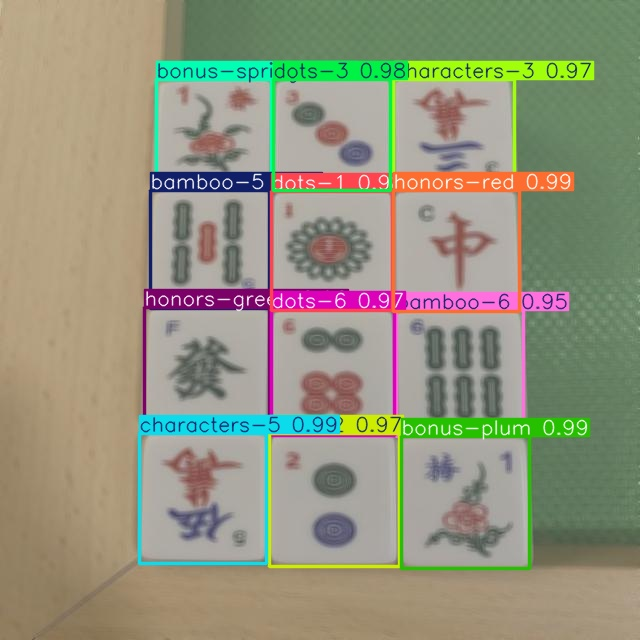



runs/detect/predict4\aug_img3.jpg


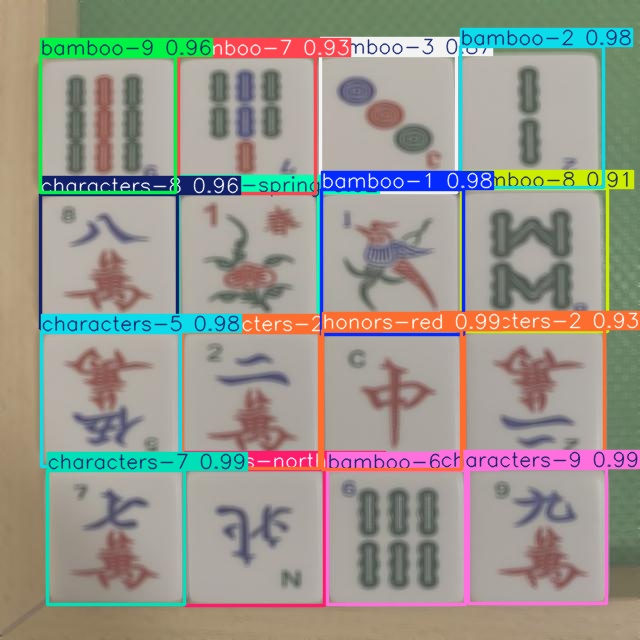



runs/detect/predict4\aug_img5.jpg


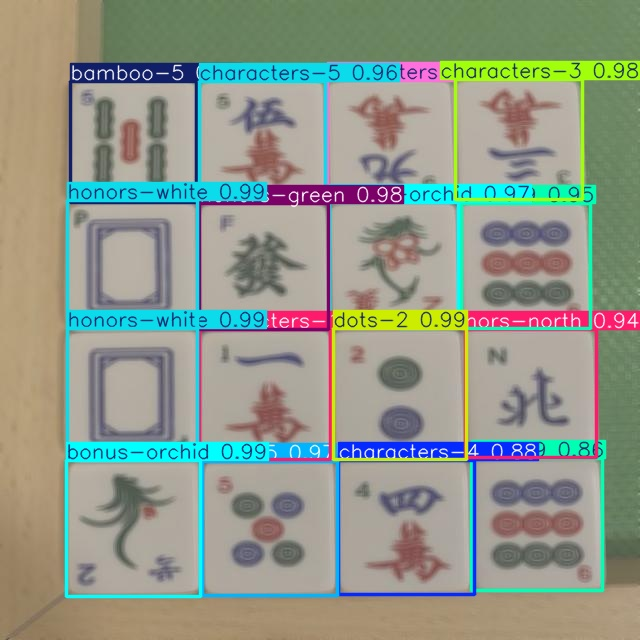



runs/detect/predict4\aug_img6.jpg


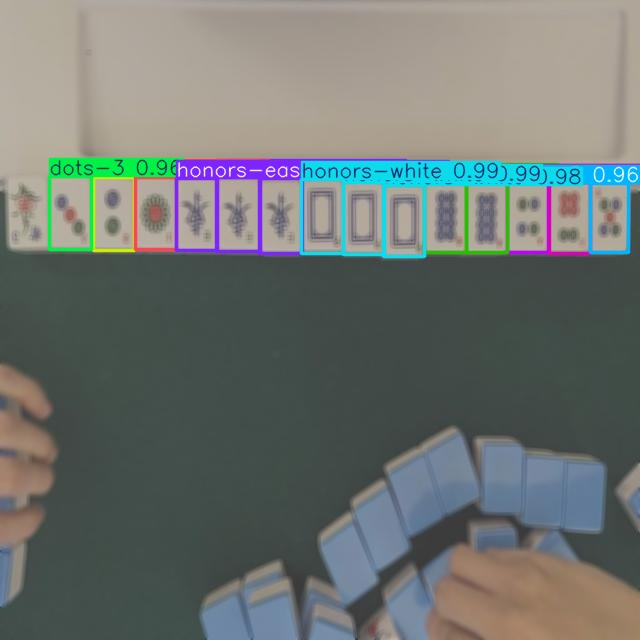

In [25]:
for image_path in glob.glob(f'runs/detect/predict4/*.jpg'):
    print(image_path)
    display(Image(filename=image_path, height=600))
    print("\n")

# run model live

In [ ]:
trained_mahjong = YOLO('runs/detect/train/weights/best.pt')

In [ ]:
results=model(source=0,show=True, conf=0.6)

# old code

from 
https://docs.opencv.org/4.x/dd/d43/tutorial_py_video_display.html

In [ ]:
cap = cv.VideoCapture(0)
if not cap.isOpened():
    print("Cannot open camera")
    exit()

In [ ]:
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
 
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    # Our operations on the frame come here
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    # Display the resulting frame
    cv.imshow('frame', gray)
    if cv.waitKey(1) == ord('q'):
        break
 
# When everything done, release the capture
cap.release()
cv.destroyAllWindows()